# INVESTMENT TRACKER - A SATURDAY EVENING CASUAL CODE

# 
# This code helps me keep track of my investments
# 
### Code connects to the Yahoo finance website and gets closing rate of Stock
### Important to note that code works best when market has closed since the closing rate will show up
### Code calculates current value, profit %, CAGR
### Bar chart to show what the CAGR of each stock bought is
# 
##### Needless to say but data shown below is populated with dummy data and does not reflect my actual portfolio.
## 

##### 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Investment Records v3.xlsx")
df = df.drop(columns = ['Sr. No.','Years Held','Current Value','Profit %','CAGR'])
df.head()

,TICKER,Buy Rate,Quantity,Buy Cost,Buy Date
0,ASIANPAINT,1805.00,30,55774.500,2020-05-28
1,ASIANPAINT,2001.00,25,51525.750,2020-07-04
2,JSWSTEEL,336.15,80,27698.760,2020-11-20
3,IDFCFIRSTB,35.90,50,1848.850,2020-12-24
4,IDFCFIRSTB,51.10,75,3947.475,2021-04-23


In [3]:
# Calculating how many years the Stock is held by me

from datetime import datetime

df['Buy Date'] = [x.date() for x in df['Buy Date']]
df['Buy Date'] = pd.to_datetime(df['Buy Date'])

today = datetime.today().date()
today = '2023-09-23'    # This line needs to be commented out when running the code on days other than Sunday.
today = pd.to_datetime(today)
today


df['Years Held'] = (today - df['Buy Date'])
df['Years Held'] = [x.total_seconds()/60/60/24/365 for x in df['Years Held']]
df

,TICKER,Buy Rate,Quantity,Buy Cost,Buy Date,Years Held
0,ASIANPAINT,1805.00,30,55774.500,2020-05-28,3.323288
1,ASIANPAINT,2001.00,25,51525.750,2020-07-04,3.221918
2,JSWSTEEL,336.15,80,27698.760,2020-11-20,2.841096
3,IDFCFIRSTB,35.90,50,1848.850,2020-12-24,2.747945
4,IDFCFIRSTB,51.10,75,3947.475,2021-04-23,2.419178
5,INFY,1316.40,30,40676.760,2021-05-14,2.361644
6,ICICIBANK,704.80,35,25408.040,2021-08-13,2.112329
7,TATAMOTORS,498.85,100,51381.550,2022-02-11,1.613699
8,HINDUNILVR,2447.40,25,63020.550,2023-03-17,0.520548
9,RELIANCE,2223.10,25,57244.825,2023-03-17,0.520548


##### 

# Now for the code to pull current price from the Yahoo Finance website

# Using the yfinance library

##### 

In [4]:
#pip uninstall yfinance
#pip install yfinance==0.2.28

In [5]:
import yfinance as yf

##### 

### Next I build a function that will  calculate the Closing Price for each Stock based on the Ticker.
### IMP - For code to work on Sun, the start date and end date will need to be adjusted accordingly.

##### 

In [6]:
def Stock_Closing_Price(stock_ticker):
    ticker = stock_ticker + '.NS'        # .NS is added because the stock is based in NSE
    tkr = yf.download(ticker,start=today,end=today)
    closing_price = tkr.iloc[0]['Close']
    return closing_price

In [7]:
df['Closing_Price'] = [Stock_Closing_Price(x) for x in df['TICKER']]
df['Profit_Percent'] = ((df['Closing_Price'] / df['Buy Rate'])-1)*100
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,TICKER,Buy Rate,Quantity,Buy Cost,Buy Date,Years Held,Closing_Price,Profit_Percent
0,ASIANPAINT,1805.00,30,55774.500,2020-05-28,3.323288,3274.850098,81.432138
1,ASIANPAINT,2001.00,25,51525.750,2020-07-04,3.221918,3274.850098,63.660675
2,JSWSTEEL,336.15,80,27698.760,2020-11-20,2.841096,774.049988,130.269221
3,IDFCFIRSTB,35.90,50,1848.850,2020-12-24,2.747945,93.599998,160.724230
4,IDFCFIRSTB,51.10,75,3947.475,2021-04-23,2.419178,93.599998,83.170251
5,INFY,1316.40,30,40676.760,2021-05-14,2.361644,1496.150024,13.654666
6,ICICIBANK,704.80,35,25408.040,2021-08-13,2.112329,950.299988,34.832575
7,TATAMOTORS,498.85,100,51381.550,2022-02-11,1.613699,620.450012,24.376067
8,HINDUNILVR,2447.40,25,63020.550,2023-03-17,0.520548,2482.449951,1.432130
9,RELIANCE,2223.10,25,57244.825,2023-03-17,0.520548,2354.949951,5.930905


##### 

### Once I have the Closing Price and Profit percentage, I can calculate CAGR

### In cases where the stock has been held for less than a year, the CAGR column is filled with the same value as the value in the Profit percentage column.

### Following function calculates CAGR and fills the CAGR column

##### 

In [8]:
df['CAGR'] = ((1 + df['Profit_Percent']/100) ** (1/df['Years Held']) - 1)*100

for x in range(len(df)):
    if df['Years Held'].loc[x] < 1:
        df['CAGR'].loc[x] = df['Profit_Percent'].loc[x]
        
df

C:\Users\Ishan\AppData\Local\Temp\ipykernel_22332\757411542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CAGR'].loc[x] = df['Profit_Percent'].loc[x]


,TICKER,Buy Rate,Quantity,Buy Cost,Buy Date,Years Held,Closing_Price,Profit_Percent,CAGR
0,ASIANPAINT,1805.00,30,55774.500,2020-05-28,3.323288,3274.850098,81.432138,19.632417
1,ASIANPAINT,2001.00,25,51525.750,2020-07-04,3.221918,3274.850098,63.660675,16.520621
2,JSWSTEEL,336.15,80,27698.760,2020-11-20,2.841096,774.049988,130.269221,34.121577
3,IDFCFIRSTB,35.90,50,1848.850,2020-12-24,2.747945,93.599998,160.724230,41.726758
4,IDFCFIRSTB,51.10,75,3947.475,2021-04-23,2.419178,93.599998,83.170251,28.426500
5,INFY,1316.40,30,40676.760,2021-05-14,2.361644,1496.150024,13.654666,5.569274
6,ICICIBANK,704.80,35,25408.040,2021-08-13,2.112329,950.299988,34.832575,15.198366
7,TATAMOTORS,498.85,100,51381.550,2022-02-11,1.613699,620.450012,24.376067,14.474269
8,HINDUNILVR,2447.40,25,63020.550,2023-03-17,0.520548,2482.449951,1.432130,1.432130
9,RELIANCE,2223.10,25,57244.825,2023-03-17,0.520548,2354.949951,5.930905,5.930905


### Setting the accuracy to two decimals on some of the columns

In [9]:
#df['Buy_Cost'] = round(int(df['Buy_Cost']),2)
df['Years Held'] = round(df['Years Held'],2)
df['Closing_Price'] = round(df['Closing_Price'],2)
df['Profit_Percent'] = round(df['Profit_Percent'],2)
df['CAGR'] = round(df['CAGR'],2)
df

,TICKER,Buy Rate,Quantity,Buy Cost,Buy Date,Years Held,Closing_Price,Profit_Percent,CAGR
0,ASIANPAINT,1805.00,30,55774.500,2020-05-28,3.32,3274.85,81.43,19.63
1,ASIANPAINT,2001.00,25,51525.750,2020-07-04,3.22,3274.85,63.66,16.52
2,JSWSTEEL,336.15,80,27698.760,2020-11-20,2.84,774.05,130.27,34.12
3,IDFCFIRSTB,35.90,50,1848.850,2020-12-24,2.75,93.60,160.72,41.73
4,IDFCFIRSTB,51.10,75,3947.475,2021-04-23,2.42,93.60,83.17,28.43
5,INFY,1316.40,30,40676.760,2021-05-14,2.36,1496.15,13.65,5.57
6,ICICIBANK,704.80,35,25408.040,2021-08-13,2.11,950.30,34.83,15.20
7,TATAMOTORS,498.85,100,51381.550,2022-02-11,1.61,620.45,24.38,14.47
8,HINDUNILVR,2447.40,25,63020.550,2023-03-17,0.52,2482.45,1.43,1.43
9,RELIANCE,2223.10,25,57244.825,2023-03-17,0.52,2354.95,5.93,5.93


##### 

## Creating a horizontal bar chart to see how the CAGR is for each stock owned and the years held

#### 

"\nplt.barh(df.index, df.CAGR, align='center')\nplt.yticks(df.index, df.TICKER)\n#plt.gca().invert_yaxis()\nplt.ylabel('CAGR')\n"

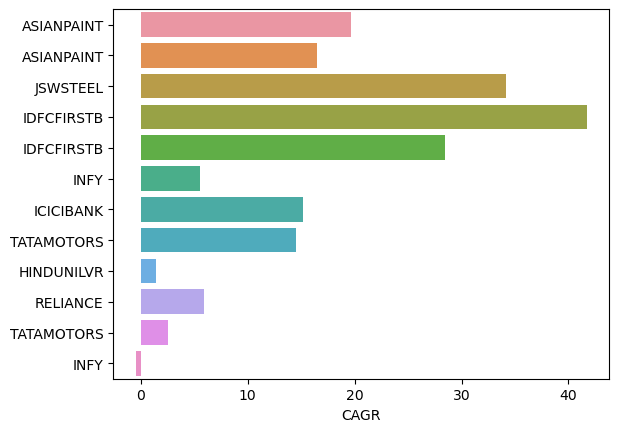

In [13]:
# Using Seaborn because it looks nice

ax = sns.barplot(x=df.CAGR, y=df.index, orient='h')
ax.set_yticklabels(df['TICKER'].values)


# Alternatively, the pyplot library can also be used

"""
plt.barh(df.index, df.CAGR, align='center')
plt.yticks(df.index, df.TICKER)
#plt.gca().invert_yaxis()
plt.ylabel('CAGR')
"""

### 
# We learn here that as long as we trust the underlying business of a company, we can see high returns for holding the stock for a long period of time.